In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_news

{'status': 'ok',
 'totalResults': 4376,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Nicole Lee',
   'title': 'Tampa teenager arrested for Twitter Bitcoin hack',
   'description': 'Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-profile accounts on July 15th, 2020. His name has not been revealed due to his underage status. According t…',
   'url': 'https://www.engadget.com/teenager-arrested-twitter-bitcoin-hack-183302700.html',
   'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-images%2F2020-07%2F80319ad0-c77f-11ea-adfe-d560f6400e1e&client=amp-blogside-v2&signature=3ae5e1a0ea67905f52a03c1a851c07fc1c61bdbb',
   'publishedAt': '2020-07-31T18:33:02Z',
   'content': 'Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “masterm

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_news

{'status': 'ok',
 'totalResults': 1205,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Joseph Green',
   'title': 'Master blockchain with this cheap online course',
   'description': "TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\n\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and blockchain technologies (which power things like Bitcoin and Eth…",
   'url': 'https://mashable.com/uk/shopping/aug-17-mega-blockchain-mastery-bundle/',
   'urlToImage': 'https://mondrian.mashable.com/2020%252F08%252F17%252F40%252F5fe1250a25cd46bca29df0fa3c2e813f.4539c.png%252F1200x630.png?signature=PeH92TKb8dmntUe5Zygr2icxP4o=',
   'publishedAt': '2020-08-17T04:00:00Z',
   'content': "TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and b

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for articles in bitcoin_news['articles']:
    try:
        text = articles['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment ['neg']
        neu = sentiment ['neu']
        
        bitcoin_sentiments.append({
            'text': text,
            'compound': compound,
            'positive':pos,
            'negative': neg,
            'neutral': neu
        })
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.head()

,text,compound,positive,negative,neutral
0,"Authorities in Tampa, Florida have arrested a ...",-0.4767,0.000,0.094,0.906
1,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
2,"On July 15, a Discord user with the handle Kir...",-0.4019,0.000,0.074,0.926
3,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000
4,The bitcoin bulls are back in town.\r\nThe pri...,0.6369,0.140,0.000,0.860


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for articles in ethereum_news['articles']:
    try:
        text = articles['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment ['neg']
        neu = sentiment ['neu']
        
        ethereum_sentiments.append({
            'text': text,
            'compound': compound,
            'positive':pos,
            'negative': neg,
            'neutral': neu
        })
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

,text,compound,positive,negative,neutral
0,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000
1,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881
2,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,0.3400,0.072,0.000,0.928
3,"August\r\n4, 2020\r\n5 min read\r\nOpinions ex...",0.5423,0.123,0.000,0.877
4,Crypto has been on a tear in the last week.\r\...,0.0000,0.000,0.000,1.000


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.009310,0.054500,0.048200,0.897300
std,0.466668,0.062498,0.054761,0.057887
min,-0.680800,0.000000,0.000000,0.762000
25%,-0.476700,0.000000,0.000000,0.859000
50%,-0.012900,0.031500,0.023000,0.910000
75%,0.507000,0.097000,0.086000,0.927250
max,0.636900,0.184000,0.157000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.051230,0.044600,0.030600,0.924800
std,0.357034,0.052703,0.054776,0.079852
min,-0.599400,0.000000,0.000000,0.732000
25%,-0.143950,0.000000,0.000000,0.902750
50%,0.000000,0.022500,0.000000,0.929500
75%,0.323650,0.074000,0.057500,1.000000
max,0.771700,0.165000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re



In [12]:
wnl = WordNetLemmatizer() 

In [13]:
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [wnl.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output


In [14]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,text,compound,positive,negative,neutral,tokens
0,"Authorities in Tampa, Florida have arrested a ...",-0.4767,0.000,0.094,0.906,"[authorities, tampa, florida, arrested, yearol..."
1,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851,"[casa, coloradobased, provider, bitcoin, secur..."
2,"On July 15, a Discord user with the handle Kir...",-0.4019,0.000,0.074,0.926,"[july, discord, user, handle, kirk, made, enti..."
3,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000,"[april, secret, service, seized, bitcoins, cla..."
4,The bitcoin bulls are back in town.\r\nThe pri...,0.6369,0.140,0.000,0.860,"[bitcoin, bull, back, townthe, price, bitcoin,..."


In [15]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000,"[tldr, mega, blockchain, mastery, bundle, sale..."
1,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881,"[outspoken, bitcoin, whale, rarely, show, affe..."
2,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,0.3400,0.072,0.000,0.928,"[reutersrick, wilkingullimichael, novogratz, t..."
3,"August\r\n4, 2020\r\n5 min read\r\nOpinions ex...",0.5423,0.123,0.000,0.877,"[august, min, readopinions, expressed, entrepr..."
4,Crypto has been on a tear in the last week.\r\...,0.0000,0.000,0.000,1.000,"[crypto, ha, tear, last, weekbitcoin, last, se..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bitcoin_counts = Counter(ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2))
bitcoin_counts.most_common(10)

[(('satoshi', 'nakaboto'), 4),
 (('charsreuters', 'several'), 3),
 (('several', 'week'), 3),
 (('week', 'trading'), 3),
 (('trading', 'narrow'), 3),
 (('narrow', 'range'), 3),
 (('range', 'bitcoin'), 3),
 (('bitcoin', 'breached'), 3),
 (('breached', 'sunday'), 3),
 (('sunday', 'first'), 3)]

In [18]:
ether_counts = Counter(ngrams(tokenizer(ethereum_df.text.str.cat()), n=2))
ether_counts.most_common(10)

[(('satoshi', 'nakaboto'), 2),
 (('btc', 'trading'), 2),
 (('trading', 'around'), 2),
 (('creator', 'coin'), 2),
 (('tldr', 'mega'), 1),
 (('mega', 'blockchain'), 1),
 (('blockchain', 'mastery'), 1),
 (('mastery', 'bundle'), 1),
 (('bundle', 'sale'), 1),
 (('sale', 'august'), 1)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
bitcoin_top = tokenizer(bitcoin_df.text.str.cat())
token_count(bitcoin_top, 10)

[('bitcoin', 17),
 ('twitter', 5),
 ('several', 4),
 ('service', 4),
 ('today', 4),
 ('ha', 4),
 ('since', 4),
 ('satoshi', 4),
 ('nakaboto', 4),
 ('tampa', 3)]

In [21]:
# Get the top 10 words for Ethereum
ethereum_top = tokenizer(ethereum_df.text.str.cat())
token_count(ethereum_top, 10)

[('bitcoin', 6),
 ('ethereum', 5),
 ('blockchain', 4),
 ('btc', 4),
 ('trading', 4),
 ('cryptocurrency', 3),
 ('crypto', 3),
 ('price', 3),
 ('ha', 3),
 ('last', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

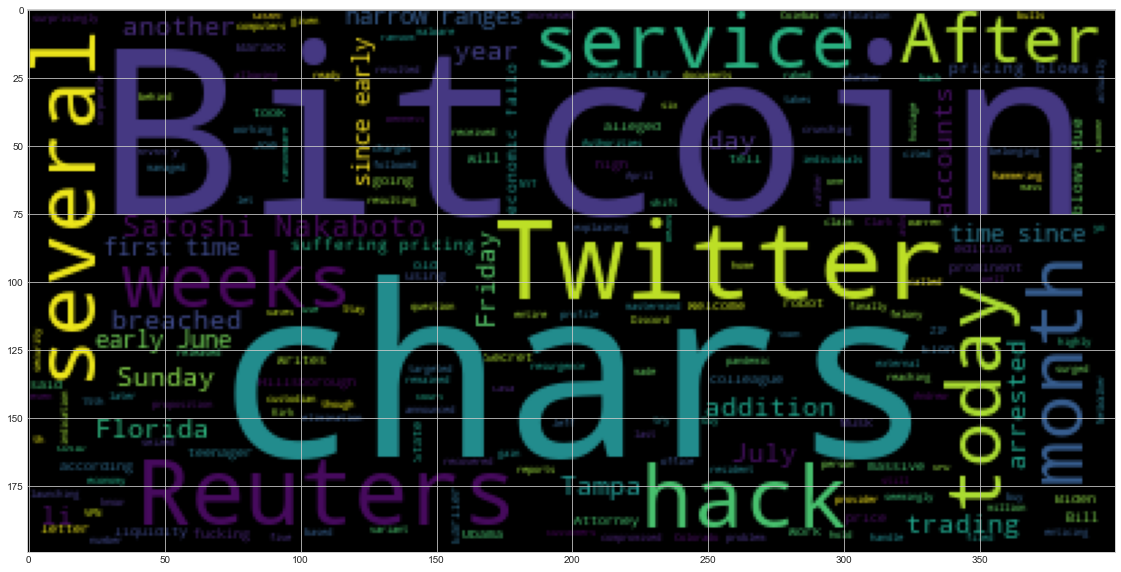

In [23]:
# Generate the Bitcoin word cloud
bc_wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(bc_wc)

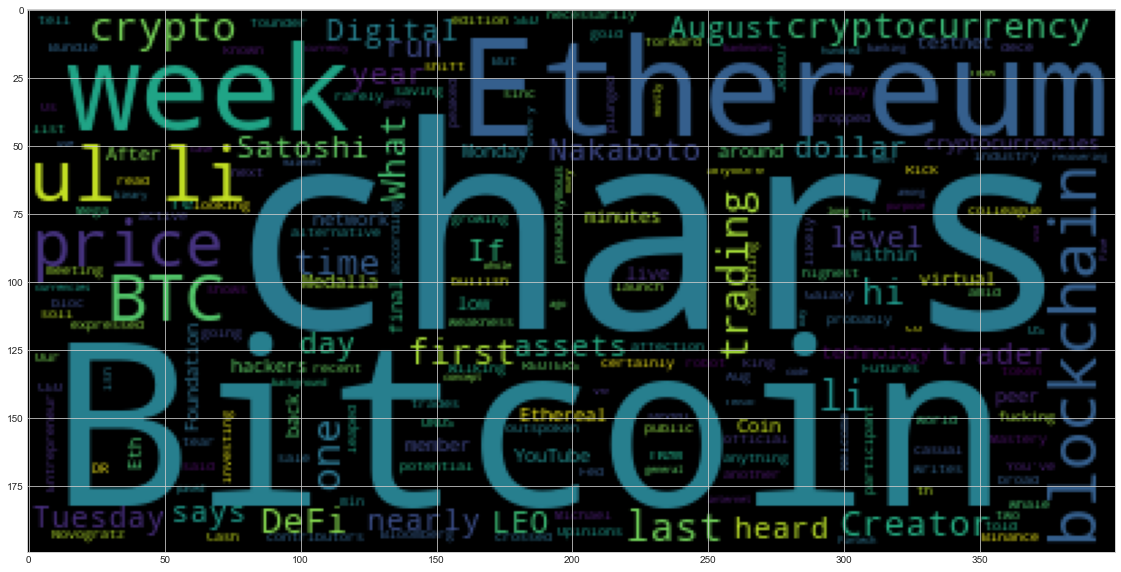

In [24]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together
bitcoin_text = bitcoin_df.text.str.cat()
bitcoin_text

'Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-profile accounts on July 15th, 2020. His name h… [+463 chars]Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]On July 15, a Discord user with the handle Kirk#5270 made an enticing proposition. I work for Twitter, they said, according to court documents released Friday. I can claim any name, let me know if yo… [+3660 chars]In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett received a letter explaining that the Secret Service had recovered 100 of his Bitcoins. The letter cited… [+884 chars]The bitcoin bulls are back in town.\r\nThe price of bitcoin surged today by $1,268.19, reaching a six-month high of $11,203.90, or a one-day gain

In [30]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [33]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [37]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Tampa GPE
Florida GPE
17-year-old DATE
Twitter Bitcoin ORG
July 15th, 2020 DATE
Colorado GPE
Coinbas ORG
July 15 DATE
Discord GPE
Twitter ORG
Friday DATE
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
months DATE
Guy PERSON
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
this month DATE
Twitter ORG
Elon Musk PERSON
Joe Biden PERSON
Barack Obama PERSON
Bill Gates PERSON
Jeff Bezos PERSON
Andrew Warren PERSON
today DATE
30 CARDINAL
17-year-old DATE
Tampa GPE
Florida GPE
VPN PRODUCT
several weeks DATE
bitcoin GPE
10,000 MONEY
Sunday DATE
first ORDINAL
early June DATE
several weeks DATE
bitcoin GPE
10,000 MONEY
Sunday DATE
first ORDINAL
early June DATE
chars](CNN)A teenager PERSON
Tampa GPE
Friday DATE
Twitter ORG
earlier this month DATE
Joe Biden PERSON
Bill G PERSON
several weeks DATE
bit

---

## Ethereum NER

In [38]:
# Concatenate all of the bitcoin text together
ethereum_text = ethereum_df.text.str.cat()
ethereum_text

"TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars]An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.\r\nThe pseudonymous trader known as Joe007 says UNUS SED LEO (LEO) may be a soli… [+1503 chars]REUTERS/Rick Wilking\r\n<ul><li>Michael Novogratz told Bloomberg the price of gold could certainly get up to $3,000.\xa0</li><li>The Galaxy Digital CEO and co-founder said the next Fed meeting could be th… [+1981 chars]August\r\n4, 2020\r\n5 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIf you have been an active or casual participant in the blockchain industry, you have likely heard of dece… [+5924 chars]Crypto has been on a tear in the last week.\r\nBitcoin is up 18% in the last seven days:\r\nEthereum is up over 30% in the las

In [39]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [40]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [41]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

29.81 MONEY
August 17 DATE
97% PERCENT
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Rick Wilking PERSON
ul><li PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
The Galaxy Digital ORG
Fed ORG
4 CARDINAL
2020 DATE
5 CARDINAL
the last week DATE
Bitcoin GPE
18% PERCENT
the last seven days DATE
over 30% PERCENT
the last week DATE
first ORDINAL
Bitcoin GPE
11,000 MONEY
nearly a year DATE
Tuesday DATE
US GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
first ORDINAL
Medalla PERSON
the Ethereum Foundation ORG
ul><li PERSON
Medalla GPE
Aug. 2 DATE
418 MONEY
5 minutes TIME
25% PERCENT
Binance Futures ORG
ETH ORG
as low as $302 MONEY
385 MONEY
10 minutes TIME
chars]usa PRODUCT
one hundred dollar MONEY
Fintech ORG
chars]Five years ago this week DATE
first ORDINAL
Bitcoins ORG
chars]Last week DATE
YouTube PRODUCT
Bitcoin GPE
one-week DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $11,595 MONEY
20:0 CARDINAL
Monday DATE
50